In [82]:
import numpy as np
import pandas as pd


In [83]:
np.random.randn (12, 5)

array([[-0.08080397, -0.72761512,  0.25482901, -0.06677778,  0.64277466],
       [ 0.53024677,  1.44613141,  1.13658952, -0.31900225, -0.01514713],
       [-0.11910933, -2.20836387, -0.23661571,  1.73542616, -1.11512167],
       [-0.13108975, -0.66048031, -1.14562293,  1.62918731,  0.1527367 ],
       [-1.05828522, -0.10194848,  0.04771979, -1.97987568,  1.11861489],
       [ 0.71985978,  1.37751003,  0.08479693, -0.51079613,  1.8800949 ],
       [ 0.23672654,  0.68017978, -0.00630403, -0.20029988,  0.20981315],
       [ 0.22817706,  1.34103368,  1.15154069, -1.62247894,  0.56385598],
       [ 1.89579139,  0.66821393,  0.9434644 , -0.39127681,  0.61934484],
       [-0.76369214,  0.96488728, -0.74145421,  1.31859127, -0.30966987],
       [-1.18283883, -0.6051015 , -0.75397441,  1.05313404,  0.905865  ],
       [ 0.86426072, -0.67968274, -0.66236409, -0.39747486, -0.33473222]])

In [86]:
names = ['Ret_1', 'Ret_2', 'Ret_3', 'Ret_4', 'Ret_5']
months = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]
names
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [94]:
df=pd.DataFrame(np.random.randn (12, 5)*10, columns = names,index = months)
df.tail() # head display first 5 rows
df.describe().round(2)

,Ret_1,Ret_2,Ret_3,Ret_4,Ret_5
count,12.00,12.00,12.00,12.00,12.00
mean,1.03,1.15,1.73,-0.58,-1.33
std,6.99,8.57,12.04,11.07,13.07
min,-10.81,-13.36,-14.00,-16.74,-27.89
25%,-2.40,-5.90,-6.32,-7.38,-9.26
50%,1.17,0.66,-3.35,-1.30,-1.31
75%,5.06,6.54,11.75,5.43,7.69
max,12.10,15.10,22.63,16.95,19.70


### loc[ ] and iloc[ ] 

- to subset dataframe using label-based or integer-based lookups, respectively
- df.loc[row_indexer,col_indexer]
- df.loc[],  end index inclusive.
- Using  .iloc [] end index is exclusive

In [97]:
df['Ret_1'].describe()
df.loc[:,['Ret_1','Ret_2','Ret_3']].head()  # varible name location lookup
df.iloc[:,[0,1,2]].head()#integer lookup

,Ret_1,Ret_2,Ret_3
January,3.709130,-6.319424,-10.445006
February,0.903412,5.947347,-6.184924
March,0.129880,7.825320,22.631324
April,-10.813101,-13.359300,-6.709417
May,7.395038,6.112647,-2.491739


In [99]:
# A DataFrame has a row and a column index 
my_portfolio = {
                "stock_name": ["MRF", "PVR", "HDFCAMC", "REL","TCS", "Infosys","SBI"],
                "quantity_owned": [2, 100, 20, 30, 100,50,200],
                "Type":["L","M","M","S","L","L","S"],
                "average_buy_price": [78000, 1450, 2880, 1900, 2345, 1708,270]
                }
                               
df=pd.DataFrame(my_portfolio)
df.info()
print(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   stock_name         7 non-null      object
 1   quantity_owned     7 non-null      int64 
 2   Type               7 non-null      object
 3   average_buy_price  7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes
  stock_name  quantity_owned Type  average_buy_price
0        MRF               2    L              78000
1        PVR             100    M               1450


In [100]:
df.dtypes

stock_name           object
quantity_owned        int64
Type                 object
average_buy_price     int64
dtype: object

In [103]:
df.describe()
df.describe(include='all')

,stock_name,quantity_owned,Type,average_buy_price
count,7,7.000000,7,7.000000
unique,7,NaN,3,NaN
top,REL,NaN,L,NaN
freq,1,NaN,3,NaN
mean,NaN,71.714286,NaN,12650.428571
std,NaN,68.072790,NaN,28827.829979
min,NaN,2.000000,NaN,270.000000
25%,NaN,25.000000,NaN,1579.000000
50%,NaN,50.000000,NaN,1900.000000
75%,NaN,100.000000,NaN,2612.500000


In [108]:
df_cat = df.assign(
      stock_name = df.stock_name.astype('category'),
      Type = df.Type.astype('category')
    )
df_cat.dtypes
var_names = df_cat.columns
var_names

Index(['stock_name', 'quantity_owned', 'Type', 'average_buy_price'], dtype='object')

In [105]:
df_cat.describe(include='category')

,stock_name,Type
count,7,7
unique,7,3
top,TCS,L
freq,1,3


In [110]:

df.sort_values(by='average_buy_price',ascending=False)
#df.sort_values(by="average_buy_price",ascending=False)
df.sort_values(by=['average_buy_price','stock_name'],ascending=False)

,stock_name,quantity_owned,Type,average_buy_price
0,MRF,2,L,78000
2,HDFCAMC,20,M,2880
4,TCS,100,L,2345
3,REL,30,S,1900
5,Infosys,50,L,1708
1,PVR,100,M,1450
6,SBI,200,S,270


In [113]:
grouped=df.groupby('Type')
for name,group in grouped: 
    print (name)
    print (group)

L
  stock_name  quantity_owned Type  average_buy_price
0        MRF               2    L              78000
4        TCS             100    L               2345
5    Infosys              50    L               1708
M
  stock_name  quantity_owned Type  average_buy_price
1        PVR             100    M               1450
2    HDFCAMC              20    M               2880
S
  stock_name  quantity_owned Type  average_buy_price
3        REL              30    S               1900
6        SBI             200    S                270


In [114]:
print (grouped.agg([np.min,np.mean,np.max,np.std]))

     quantity_owned                              average_buy_price         \
               amin        mean amax         std              amin   mean   
Type                                                                        
L                 2   50.666667  100   49.003401              1708  27351   
M                20   60.000000  100   56.568542              1450   2165   
S                30  115.000000  200  120.208153               270   1085   

                           
       amax           std  
Type                       
L     78000  43864.477006  
M      2880   1011.162697  
S      1900   1152.584053  


In [116]:
portfolio=df.rename(columns={'quantity_owned':'Qty','Type':'Class',
                             'average_buy_price':'LTP',
                             'stock_name':'script'
                             })
portfolio



,script,Qty,Class,LTP
0,MRF,2,L,78000
1,PVR,100,M,1450
2,HDFCAMC,20,M,2880
3,REL,30,S,1900
4,TCS,100,L,2345
5,Infosys,50,L,1708
6,SBI,200,S,270


In [120]:
print (portfolio["Qty"].corr(portfolio["LTP"])*100)

-47.229932340258586


In [121]:
portfolio.drop([3,4],) # [ row,col]

,script,Qty,Class,LTP
0,MRF,2,L,78000
1,PVR,100,M,1450
2,HDFCAMC,20,M,2880
5,Infosys,50,L,1708
6,SBI,200,S,270


In [122]:
import datetime as dt
import pandas as pd
import numpy as np
np.random.seed(1)
dates = pd.date_range('20/12/2020', periods=10) 
dates

DatetimeIndex(['2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29'],
              dtype='datetime64[ns]', freq='D')

In [139]:
np.random.seed(1)
s1 = pd.Series(np.random.randn(10),index = dates) 
#print(s1)

s2 = pd.Series(np.random.randn(10),index = dates) 
s2

2020-12-20    1.462108
2020-12-21   -2.060141
2020-12-22   -0.322417
2020-12-23   -0.384054
2020-12-24    1.133769
2020-12-25   -1.099891
2020-12-26   -0.172428
2020-12-27   -0.877858
2020-12-28    0.042214
2020-12-29    0.582815
Freq: D, dtype: float64

In [140]:

data = pd.concat([s1, s2], axis=1)
data.columns=["S1","S2"]
print(data.head())
print (data["S1"].corr(data["S2"])*100)

                  S1        S2
2020-12-20  1.624345  1.462108
2020-12-21 -0.611756 -2.060141
2020-12-22 -0.528172 -0.322417
2020-12-23 -1.072969 -0.384054
2020-12-24  0.865408  1.133769
65.56177144470318


In [146]:
mp2020 = pd.period_range('1/1/2020', '12/31/2020', freq='M')
mp2020


PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', freq='M')

In [147]:
np.random.seed(1)
df=pd.DataFrame(np.random.randn (12,2)*10, mp2020)
df.columns=["S","M"]
df

,S,M
2020-01,16.243454,-6.117564
2020-02,-5.281718,-10.729686
2020-03,8.654076,-23.015387
2020-04,17.448118,-7.612069
2020-05,3.190391,-2.493704
2020-06,14.621079,-20.601407
2020-07,-3.224172,-3.840544
2020-08,11.337694,-10.998913
2020-09,-1.724282,-8.778584
2020-10,0.422137,5.828152


In [154]:
import os
os.getcwd()   # get current working directory
#os.chdir('/Users/apple/Desktop/Others/PY_EPAT/ANACONDA/PYFIN/')

'/Users/apple/Desktop/Others/PY_EPAT/ANACONDA/PYFIN'

In [177]:
df = pd.read_csv("HSV1.csv") 
#df = pd.read_csv("HSV1.csv",usecols=['date', 'Open','Close']) 
#df = pd.read_csv("HSV1.csv",usecols=[0,2,4]) 

df.set_index('date',inplace=True)
df.head()
df.nlargest(n=5,columns='Close')
df.nsmallest(n=5,columns='Open')
df.sample(5,random_state=0)
#df.sort_index(axis=1).head()
df = pd.read_csv('HSV1.csv',index_col='date',parse_dates = True) 
df['2017-09-01':'2017-09-10']
df.asof('2017-09-17')

Open     10062.35
High     10115.15
Low      10043.65
Close    10085.40
Name: 2017-09-17 00:00:00, dtype: float64

In [171]:
#df.head().assign(day_of_week=lambda x: x.index.day_name())
df.head().assign(month=lambda x: x.index.month_name())
#df_month = df.assign(month=lambda x:x.index.month_name())
#df_month.head(3)


,Open,High,Low,Close,month
date,,,,,
2017-09-01,9937.65,9983.45,9909.85,9974.40,September
2017-09-04,9984.15,9988.40,9861.00,9912.85,September
2017-09-05,9933.25,9963.10,9901.05,9952.20,September
2017-09-06,9899.25,9931.55,9882.55,9916.20,September
2017-09-07,9945.85,9964.85,9917.20,9929.90,September


In [26]:
df_month.groupby('month').mean()


,Open,High,Low,Close
month,,,,
December,10266.726667,10309.516667,10203.466667,10261.426667
November,10344.175000,10369.638636,10293.706818,10324.754545
October,10136.810000,10170.100000,10098.545000,10138.677500
September,9998.411905,10023.166667,9941.530952,9977.916667


In [27]:
df_month.groupby('month')['Close'].agg(['mean','min','max','std'])

,mean,min,max,std
month,,,,
December,10261.426667,10044.10,10463.20,133.763851
November,10324.754545,10118.05,10452.50,89.184753
October,10138.677500,9859.50,10363.65,162.073922
September,9977.916667,9735.75,10153.10,128.094462


In [190]:
 
#df.head(3)

#df[['Open','Close']][1:5].equals(df[1:5][['Open','Close']])

df1 = df.reset_index()
df.head(2)
#df1.at[0,'Close']

#print(df1.loc[:4])
#print(df1.loc[3:10])
#print(df1.loc[[3,6,9],['Open','Close']])
#print (df1.loc[:6])
print (df.iloc[4:10])
#print (df1.iloc[:4,:3])  # row till 4, col till 3
#print (df.iloc[:7]) # first 7 row
#print (df1.iloc[[1, 3, 5,7], [0,1,4]])
#df['diff']= df['Open']-df['Close']
#print(df[::-1].head()) # descending order
#print(df.tail())

                Open      High       Low     Close
date                                              
2017-09-07   9945.85   9964.85   9917.20   9929.90
2017-09-08   9958.65   9963.60   9913.30   9934.80
2017-09-11   9971.75  10028.65   9968.80  10006.05
2017-09-12  10056.85  10097.55  10028.05  10093.05
2017-09-13  10099.25  10131.95  10063.15  10079.30
2017-09-14  10107.40  10126.50  10070.35  10086.60


In [29]:
df = pd.read_csv("HSV1.csv") 
#df[df.Close > 9950]
#df.loc[df.Close > 9950,['Open','Close']]
#df.loc[df.Close.between(9950,10000),['Open','Close']]
#[df.Close.idxmin(),df.Close.idxmax()]
#df.loc[[18,75]]
#df.assign(
   #closediv = np.log(df['Close']),
   #opendiv =  df['Open']/100).head()
#del df['date']
#df.drop([0,1]).head()
#df.drop(columns=['Open','Low']).head()


In [ ]:
#! pip install nsepy
from nsepy import get_history
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

In [194]:
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 24)
sbi = get_history(symbol='SBIN',start=start,end=end)
sbi['Close'].tail()

Exception in thread Thread-30:
Traceback (most recent call last):
  File "/Users/apple/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/apple/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 416, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/apple/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
TimeoutError: [Errno 60] Operation timed out

During handling of the

AttributeError: 'ThreadReturns' object has no attribute 'result'

In [195]:
sbi['logRet']= np.log(sbi['Close'])/sbi['Close'].shift(1)
sbi['logRet'].head()

Date
2020-11-19         NaN
2020-11-20    0.022907
2020-11-23    0.022555
2020-11-24    0.023027
2020-11-25    0.022526
Name: logRet, dtype: float64

In [196]:
sbi.dropna(axis=0, how='any', inplace=True)
sbi.tail(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,logRet
Date,,,,,,,,,,,,,,,
2020-12-16,SBIN,EQ,270.65,272.8,273.65,268.5,269.35,269.40,270.58,24844177,6.722276e+14,150489,4406059,0.1773,0.020677
2020-12-17,SBIN,EQ,269.40,270.0,272.15,266.7,267.35,267.70,269.19,25904699,6.973310e+14,146174,4320467,0.1668,0.020749
2020-12-18,SBIN,EQ,267.70,267.7,271.95,265.0,271.35,271.45,268.30,29816205,7.999718e+14,159604,5872798,0.1970,0.020933


In [197]:
sbi['logRet'].describe().T

count    20.000000
mean      0.021629
std       0.000944
min       0.020426
25%       0.020737
50%       0.021494
75%       0.022534
max       0.023027
Name: logRet, dtype: float64

In [202]:

sbi.assign(
     volume_pct_change=sbi.Volume.pct_change(),
     pct_change_rank=lambda x: x.volume_pct_change.abs().rank(ascending=False)
     ).nsmallest(5,'pct_change_rank')

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,logRet,volume_pct_change,pct_change_rank
Date,,,,,,,,,,,,,,,,,
2020-11-25,SBIN,EQ,243.85,245.45,249.90,241.60,243.00,243.00,246.09,74767232,1.839933e+15,306740,10185429,0.1362,0.022526,0.569533,1.0
2020-12-02,SBIN,EQ,248.05,248.35,250.85,244.10,246.55,246.95,247.75,56723083,1.405294e+15,221604,13306764,0.2346,0.022210,0.532921,2.0
2020-12-03,SBIN,EQ,246.95,249.30,259.00,248.00,256.40,256.30,255.15,79266442,2.022472e+15,361390,17214792,0.2172,0.022459,0.397428,3.0
2020-12-14,SBIN,EQ,272.45,274.00,276.15,272.35,274.25,274.20,274.69,31946501,8.775317e+14,200577,8886488,0.2782,0.020605,-0.364315,4.0
2020-12-01,SBIN,EQ,244.25,245.00,248.95,244.25,247.65,248.05,246.58,37003272,9.124277e+14,186048,9607134,0.2596,0.022574,-0.319238,5.0


In [205]:
sbi_vol_bin = pd.cut(sbi.Volume,bins=3,
                     labels=['low','med','high'])
sbi_vol_bin.value_counts(normalize=True)

med     0.35
low     0.35
high    0.30
Name: Volume, dtype: float64

In [206]:
sbi_vol_bin_qt = pd.qcut(sbi.Volume,q=4,
                     labels=['q1','q2','q3','q4'])
sbi_vol_bin_qt.value_counts()

q4    5
q3    5
q2    5
q1    5
Name: Volume, dtype: int64

In [ ]:
sbi.Volume.describe()
sbi.Volume.clip(5.484418e+07,6.790493e+07).value_counts()

In [38]:
sbi[['Close','Volume','logRet']].head()
sbi_8day= sbi[['Close','Volume','logRet']].head(8)
sbi_8day

,Close,Volume,logRet
Date,,,
2020-01-02,339.30,20324236,0.017422
2020-01-03,333.70,21853208,0.017124
2020-01-06,319.00,35645325,0.017277
2020-01-07,318.40,50966826,0.018067
2020-01-08,319.80,44527485,0.018115
2020-01-09,330.20,40348407,0.018135
2020-01-10,332.25,42377838,0.017583
2020-01-13,330.75,23615129,0.017461


In [207]:
sbi.assign(close_ewma=lambda x: x.Close.ewm(span=5)
           .mean()).tail()[['Close','close_ewma']]

,Close,close_ewma
Date,,
2020-12-14,274.20,270.659195
2020-12-15,270.65,270.656127
2020-12-16,269.40,270.237134
2020-12-17,267.70,269.391041
2020-12-18,271.45,270.077567


In [40]:
sbi.agg({
     'Open': np.mean, 'High': np.max, 'Low': np.min, 
     'Close': np.mean, 'Volume': np.sum }
)

Open      2.226475e+02
High      3.398500e+02
Low       1.494500e+02
Close     2.219642e+02
Volume    1.497854e+10
dtype: float64

In [41]:
sbi.agg({
     'Open': np.mean, 'High': ['min','max'],
     'Close': np.mean, 'Volume': np.sum }
)

,Open,High,Close,Volume
max,NaN,339.85,NaN,NaN
mean,222.647531,NaN,221.964198,NaN
min,NaN,153.20,NaN,NaN
sum,NaN,NaN,NaN,1.497854e+10


In [42]:
df_month.pivot_table(columns='month')

month,December,November,October,September
Close,10261.426667,10324.754545,10138.6775,9977.916667
High,10309.516667,10369.638636,10170.1000,10023.166667
Low,10203.466667,10293.706818,10098.5450,9941.530952
Open,10266.726667,10344.175000,10136.8100,9998.411905


In [43]:
pd.crosstab(
     index=df_month.Close,
     columns=df_month.index.month,
     colnames=['month'] # name the columns index
         )



month,9,10,11,12
Close,,,,
9735.75,1,0,0,0
9768.95,1,0,0,0
9788.60,1,0,0,0
9859.50,0,1,0,0
9871.50,1,0,0,0
...,...,...,...,...
10440.50,0,0,1,0
10444.20,0,0,0,1
10451.80,0,0,1,0


In [208]:
sbi_close = sbi['Close']
sbiret = np.log(sbi_close).diff()
sbiret.describe()

count    19.000000
mean      0.005881
std       0.014611
min      -0.016825
25%      -0.004765
50%       0.006403
75%       0.014675
max       0.037163
Name: Close, dtype: float64

In [209]:
def calc_daily_returns(closes):
       return np.log(closes/closes.shift(1))
daily_returns = calc_daily_returns(sbi_close)
daily_returns.describe()

count    19.000000
mean      0.005881
std       0.014611
min      -0.016825
25%      -0.004765
50%       0.006403
75%       0.014675
max       0.037163
Name: Close, dtype: float64

In [46]:
start = datetime(2020, 11, 19)
end = datetime(2020, 12, 19)
hdfc = get_history(symbol='HDFC',start=start,end=end)
axis = get_history(symbol='AXISBANK',start=start,end=end)
sbi = get_history(symbol='SBIN',start=start,end=end)
kmb = get_history(symbol='KOTAKBANK',start=start,end=end)
pnb = get_history(symbol='PNB',start=start,end=end)
bob = get_history(symbol='BANKBARODA',start=start,end=end)
#nifty = get_history(symbol='NIFTY_50',start=start,end=end)

In [210]:
 ClosePrice=pd.concat([hdfc['Close'],axis['Close'],sbi['Close'],kmb['Close'],pnb['Close'],bob['Close']],
                      keys=['HDFC','AXIS','SBI','KMB','PNB','BOB'],axis=1)

In [211]:
ClosePrice.head()


,HDFC,AXIS,SBI,KMB,PNB,BOB
2020-11-19,2324.60,611.50,NaN,1826.35,30.00,47.95
2020-11-20,2334.80,607.85,242.75,1889.40,29.80,47.55
2020-11-23,2250.80,595.60,238.70,1897.85,30.05,46.90
2020-11-24,2217.70,619.65,243.85,1924.90,30.40,46.85
2020-11-25,2191.35,599.85,243.00,1862.45,31.35,49.05


In [212]:
daily_returns = calc_daily_returns(ClosePrice)
daily_returns.describe()

,HDFC,AXIS,SBI,KMB,PNB,BOB
count,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000
mean,0.003223,-0.000164,0.005881,0.003259,0.009874,0.013728
std,0.017443,0.017452,0.014611,0.017063,0.041040,0.030644
min,-0.036641,-0.032475,-0.016825,-0.033417,-0.067499,-0.039944
25%,-0.008217,-0.012101,-0.004765,-0.001518,-0.014936,-0.009041
50%,0.002758,0.000551,0.006403,0.006918,0.005578,0.006303
75%,0.020689,0.007434,0.014675,0.011266,0.029786,0.028035
max,0.031123,0.039586,0.037163,0.033940,0.127218,0.080618


In [213]:
bankret = np.log(ClosePrice).diff()
bankret.describe().round(3)

,HDFC,AXIS,SBI,KMB,PNB,BOB
count,20.000,20.000,19.000,20.000,20.000,20.000
mean,0.003,-0.000,0.006,0.003,0.010,0.014
std,0.017,0.017,0.015,0.017,0.041,0.031
min,-0.037,-0.032,-0.017,-0.033,-0.067,-0.040
25%,-0.008,-0.012,-0.005,-0.002,-0.015,-0.009
50%,0.003,0.001,0.006,0.007,0.006,0.006
75%,0.021,0.007,0.015,0.011,0.030,0.028
max,0.031,0.040,0.037,0.034,0.127,0.081


### Graph in Python
- using matplot

<Figure size 432x288 with 0 Axes>

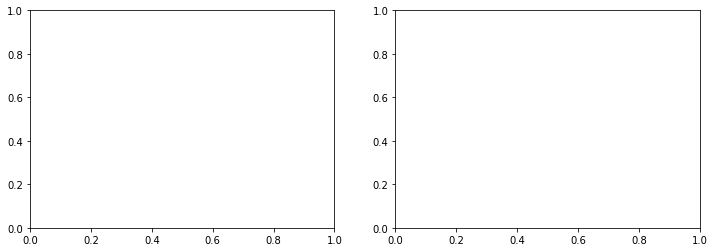

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig, axes = plt.subplots(1,2,figsize=(12,4))

In [215]:
start = datetime(2019, 1, 1)
end = datetime(2020, 12, 19)
infy = get_history(symbol='INFY',start=start,end=end)
infy['Close'].tail()

Exception in thread Thread-33:
Traceback (most recent call last):
  File "/Users/apple/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/apple/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 416, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/apple/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
TimeoutError: [Errno 60] Operation timed out

During handling of the

AttributeError: 'ThreadReturns' object has no attribute 'result'

<AxesSubplot:xlabel='Date'>

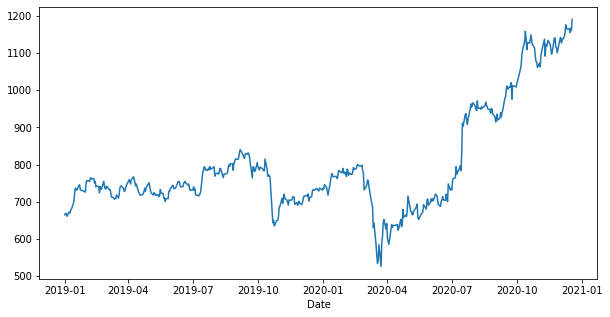

In [217]:
infy['Close'].plot(figsize=(10,5))

<AxesSubplot:title={'center':'INFOSYS last 1 year Closing price'}, xlabel='Date'>

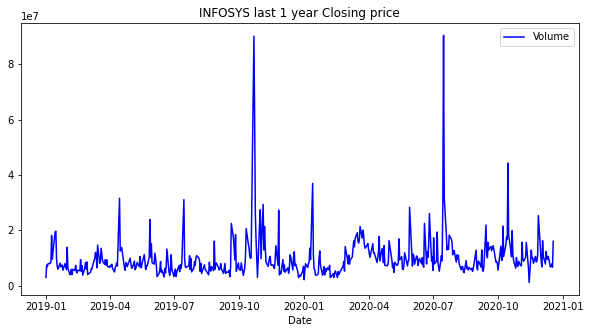

In [222]:
infy.plot(figsize=(10,5),
                  title="INFOSYS last 1 year Closing price",
                  legend=True,
                  style = 'b-',
                  y = 'Volume')

<AxesSubplot:title={'center':'INFY 2019-2020 OHLC'}, xlabel='Date'>

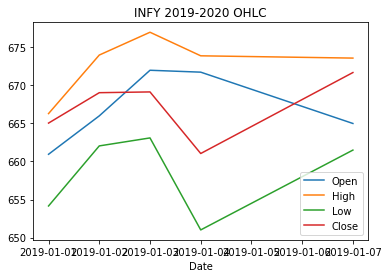

In [223]:
infy.iloc[:5,].plot(y=['Open','High','Low','Close'],title="INFY 2019-2020 OHLC")

#style=['b-o', 'r--', 'k:', 'g-.']

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

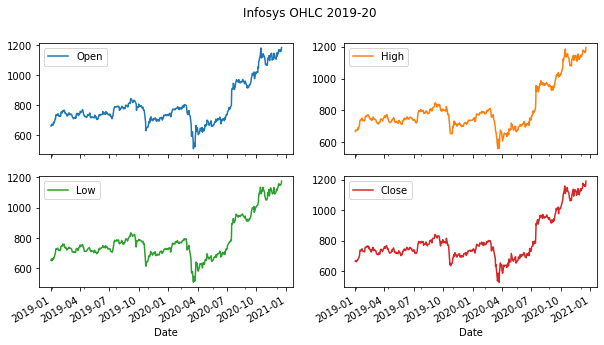

In [224]:
infy.plot(figsize=(10,5),
                  subplots=True,
                  layout=(2,2),
                  y=['Open','High','Low','Close'],
                    title = 'Infosys OHLC 2019-20' )

<AxesSubplot:>

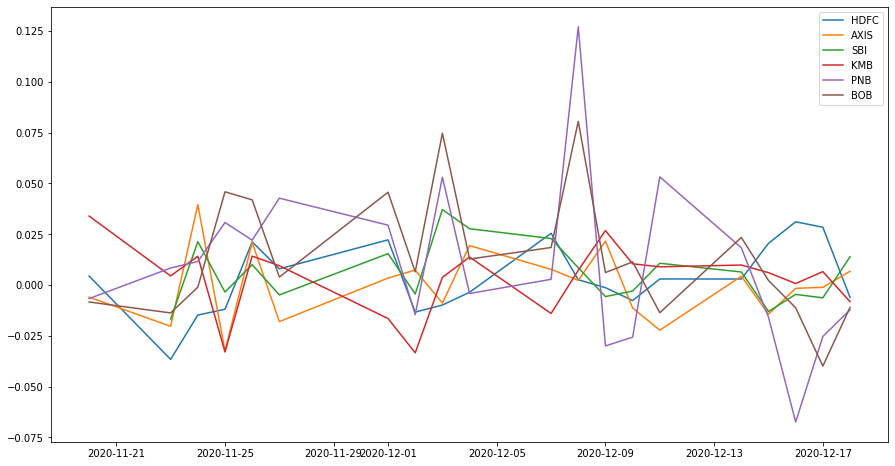

In [225]:

daily_returns.plot(figsize=(15,8))


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

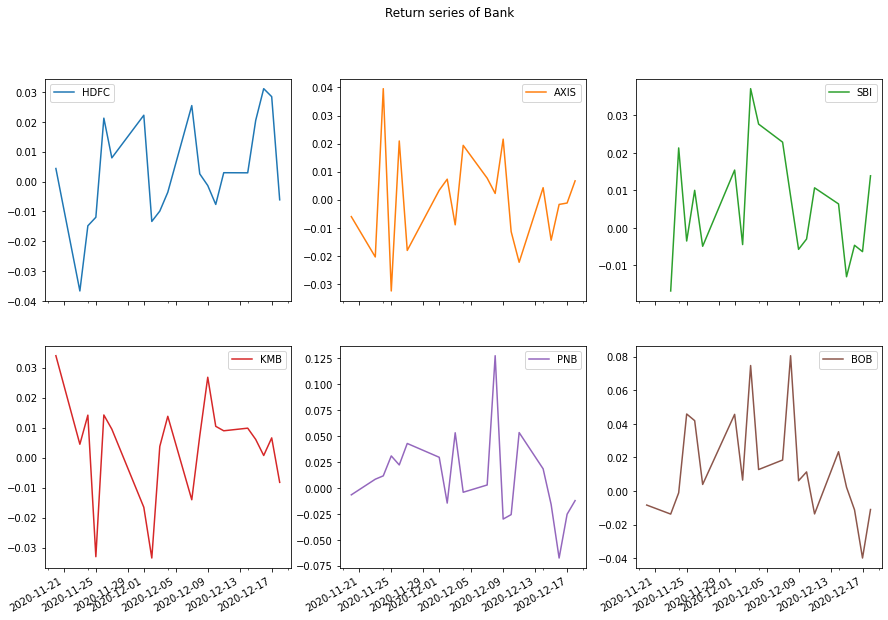

In [226]:
daily_returns.plot(subplots=True,
                  layout=(2,3), figsize = (15,10),
                  title='Return series of Bank')

<AxesSubplot:ylabel='Frequency'>

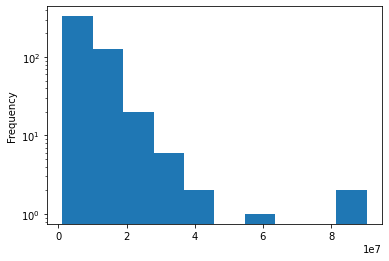

In [227]:
infy.Volume.plot(
    kind = 'hist',
    logy=True)

<AxesSubplot:ylabel='Density'>

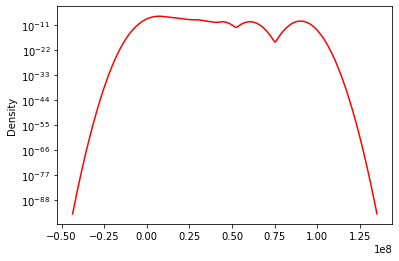

In [228]:
infy.Volume.plot(
    kind = 'kde',alpha=1,color = "red",
    logy=True)

Text(0.5, 0, 'Price (INR)')

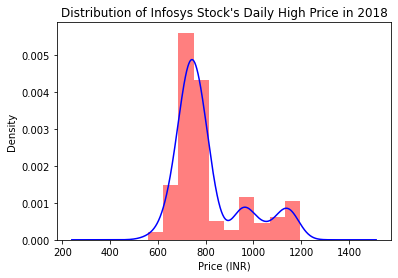

In [229]:
ax = infy.High.plot(kind='hist', density=True, alpha=0.5,color='red')
infy.High.plot(
     ax=ax, kind='kde', color='blue', 
     title='Distribution of Infosys Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price (INR)')

In [230]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,INFY,EQ,658.95,660.95,666.3,654.15,665.95,665.05,660.66,2943390,1.944579e+14,45422,1282161,0.4356
2019-01-02,INFY,EQ,665.05,666.00,674.0,662.05,668.00,669.05,669.97,7416655,4.968963e+14,108094,3880800,0.5233
2019-01-03,INFY,EQ,669.05,672.00,677.0,663.10,668.00,669.15,669.66,6827249,4.571929e+14,125781,3676359,0.5385
2019-01-04,INFY,EQ,669.15,671.75,673.9,651.00,660.25,661.05,660.17,7889310,5.208305e+14,187590,3747741,0.4750
2019-01-07,INFY,EQ,661.05,665.00,673.6,661.50,671.70,671.70,667.51,8046340,5.370974e+14,132736,4711672,0.5856


Text(0, 0.5, 'Return (INR)')

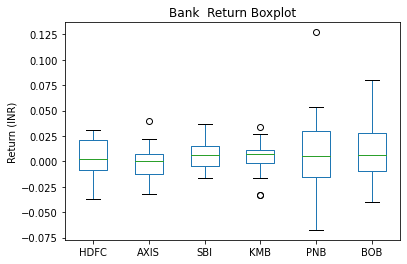

In [233]:
daily_returns.iloc[:,:7].plot(kind='box', title='Bank  Return Boxplot')
plt.ylabel('Return (INR)')


Text(0, 0.5, 'OHLC')

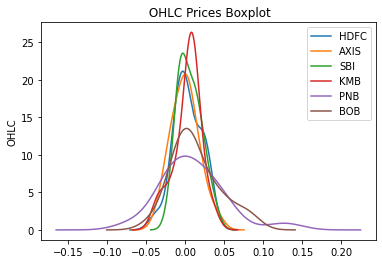

In [234]:
daily_returns.iloc[:,:7].plot(kind='kde', title=' OHLC Prices Boxplot')
plt.ylabel('OHLC')


In [235]:

ret = daily_returns.reset_index()

In [236]:
ret.dropna(axis=0).head()

,index,HDFC,AXIS,SBI,KMB,PNB,BOB
2,2020-11-23,-0.036641,-0.020359,-0.016825,0.004462,0.008354,-0.013764
3,2020-11-24,-0.014815,0.039586,0.021346,0.014152,0.011580,-0.001067
4,2020-11-25,-0.011953,-0.032475,-0.003492,-0.032981,0.030772,0.045889
5,2020-11-26,0.021244,0.020951,0.010032,0.014208,0.022083,0.041922
6,2020-11-27,0.007943,-0.018038,-0.004901,0.009483,0.042755,0.003902


In [66]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,INFY,EQ,658.95,660.95,666.3,654.15,665.95,665.05,660.66,2943390,1.944579e+14,45422,1282161,0.4356
2019-01-02,INFY,EQ,665.05,666.00,674.0,662.05,668.00,669.05,669.97,7416655,4.968963e+14,108094,3880800,0.5233
2019-01-03,INFY,EQ,669.05,672.00,677.0,663.10,668.00,669.15,669.66,6827249,4.571929e+14,125781,3676359,0.5385
2019-01-04,INFY,EQ,669.15,671.75,673.9,651.00,660.25,661.05,660.17,7889310,5.208305e+14,187590,3747741,0.4750
2019-01-07,INFY,EQ,661.05,665.00,673.6,661.50,671.70,671.70,667.51,8046340,5.370974e+14,132736,4711672,0.5856


<AxesSubplot:title={'center':'Infosys Daily High - Low vs. Volume Traded'}, xlabel='Volume', ylabel='max'>

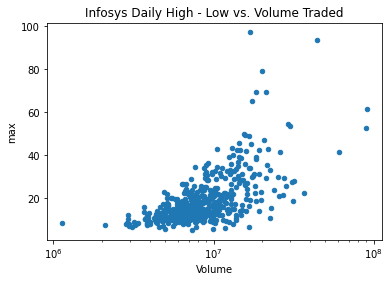

In [237]:
infy.assign(
     max= infy.High - infy.Low
).plot(
     kind='scatter', x='Volume', y='max',
     title='Infosys Daily High - Low vs. Volume Traded',
    logx=True,
    colormap = 'gray_r',
    #sharex=False
    )

<AxesSubplot:title={'center':'Infosys Daily High - Low vs. Volume Traded'}, xlabel='Volume', ylabel='ret'>

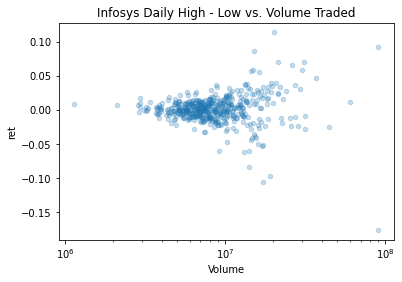

In [238]:
infy.assign(
     ret= np.log(infy.Close).diff()
).plot(
     kind='scatter', x='Volume', y='ret',
     title='Infosys Daily High - Low vs. Volume Traded',
    logx=True,alpha=.25,
    )


array([[<AxesSubplot:xlabel='Prev Close', ylabel='Prev Close'>,
        <AxesSubplot:xlabel='Open', ylabel='Prev Close'>,
        <AxesSubplot:xlabel='High', ylabel='Prev Close'>,
        <AxesSubplot:xlabel='Low', ylabel='Prev Close'>,
        <AxesSubplot:xlabel='Last', ylabel='Prev Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Prev Close'>],
       [<AxesSubplot:xlabel='Prev Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Last', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>],
       [<AxesSubplot:xlabel='Prev Close', ylabel='High'>,
        <AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Last', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>],
       

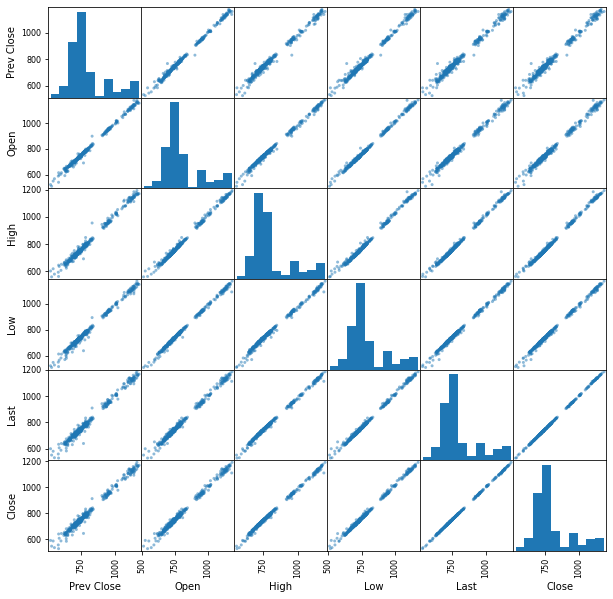

In [239]:
from pandas.plotting import scatter_matrix
scatter_matrix(infy.iloc[:,:8],figsize = (10,10))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

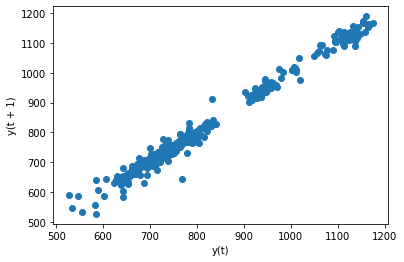

In [240]:
from pandas.plotting import lag_plot
lag_plot(infy.Close)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 30)'>

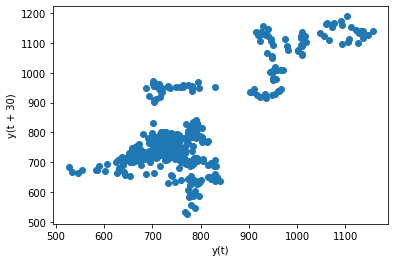

In [242]:
lag_plot(infy.Close,lag=30)

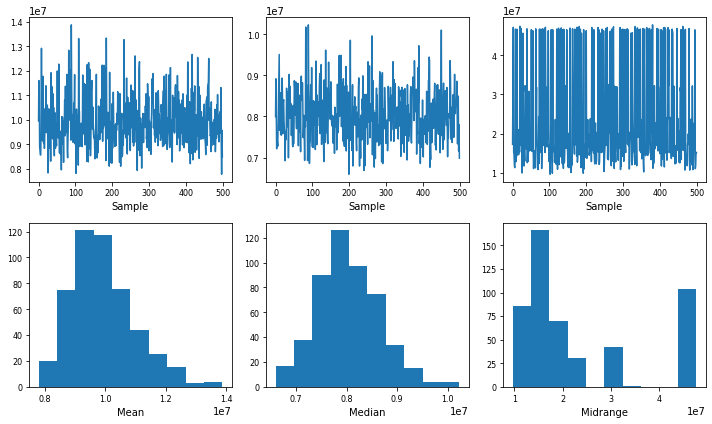

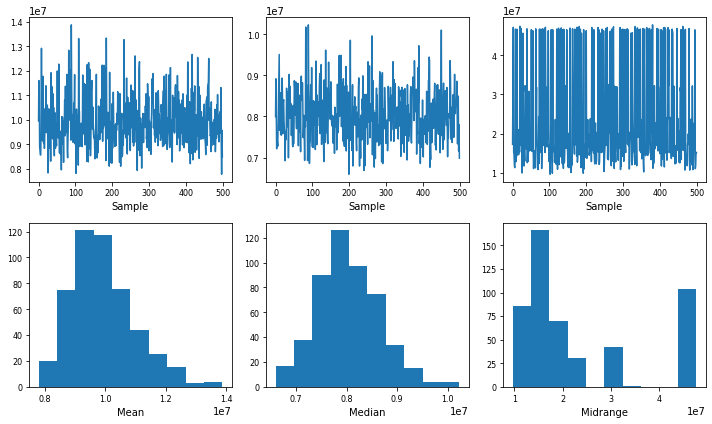

In [72]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(infy.Volume, fig=plt.figure(figsize=(10, 6)))



In [244]:
infy_ohlc = infy.iloc[:,[3,4,5,7]].reset_index()
infy_ohlc.head()

,Date,Open,High,Low,Close
0,2019-01-01,660.95,666.3,654.15,665.05
1,2019-01-02,666.00,674.0,662.05,669.05
2,2019-01-03,672.00,677.0,663.10,669.15
3,2019-01-04,671.75,673.9,651.00,661.05
4,2019-01-07,665.00,673.6,661.50,671.70


In [245]:
import datetime
infy_ohlc['month'] =  pd.DatetimeIndex(infy_ohlc['Date']).month
infy_ohlc['quarter'] =  pd.DatetimeIndex(infy_ohlc['Date']).quarter
infy_ohlc['weekday'] =  pd.DatetimeIndex(infy_ohlc['Date']).weekday
infy_ohlc['logRet']= np.log(infy_ohlc['Close'])/infy_ohlc['Close'].shift(1)
infy_ohlc.head()


,Date,Open,High,Low,Close,month,quarter,weekday,logRet
0,2019-01-01,660.95,666.3,654.15,665.05,1,1,1,NaN
1,2019-01-02,666.00,674.0,662.05,669.05,1,1,2,0.009783
2,2019-01-03,672.00,677.0,663.10,669.15,1,1,3,0.009724
3,2019-01-04,671.75,673.9,651.00,661.05,1,1,4,0.009705
4,2019-01-07,665.00,673.6,661.50,671.70,1,1,0,0.009848


In [75]:
infy_ohlc.describe()

,Open,High,Low,Close,month,quarter,weekday,logRet
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,488.000000
mean,799.224233,809.204294,790.346933,799.723722,6.408998,2.478528,2.049080,0.008545
std,142.684334,143.461911,141.355527,142.393809,3.433263,1.114385,1.424912,0.001126
min,509.250000,558.000000,509.250000,526.450000,1.000000,1.000000,0.000000,0.006010
25%,714.000000,722.350000,707.200000,714.550000,3.000000,1.000000,1.000000,0.008230
50%,747.000000,755.000000,740.150000,750.150000,6.000000,2.000000,2.000000,0.008822
75%,810.750000,822.450000,802.000000,814.900000,9.000000,3.000000,3.000000,0.009194
max,1182.850000,1195.000000,1175.600000,1189.800000,12.000000,4.000000,6.000000,0.012118


In [246]:
infy_ohlc['Ret_remarks'] = np.where(infy_ohlc['logRet'] > .0091822, "Above", "Below")
infy_ohlc.dropna()

,Date,Open,High,Low,Close,month,quarter,weekday,logRet,Ret_remarks
1,2019-01-02,666.00,674.00,662.05,669.05,1,1,2,0.009783,Above
2,2019-01-03,672.00,677.00,663.10,669.15,1,1,3,0.009724,Above
3,2019-01-04,671.75,673.90,651.00,661.05,1,1,4,0.009705,Above
4,2019-01-07,665.00,673.60,661.50,671.70,1,1,0,0.009848,Above
5,2019-01-08,674.95,677.45,668.55,670.05,1,1,1,0.009688,Above
...,...,...,...,...,...,...,...,...,...,...
484,2020-12-14,1169.40,1172.60,1148.20,1164.55,12,4,0,0.006070,Below
485,2020-12-15,1156.00,1163.70,1152.00,1154.60,12,4,1,0.006055,Below
486,2020-12-16,1160.00,1168.90,1153.60,1165.70,12,4,2,0.006116,Below
487,2020-12-17,1165.90,1168.90,1156.20,1159.20,12,4,3,0.006053,Below


In [247]:
infy_ohlc.set_index('Date',inplace=True)


In [249]:
infy_ohlc.dtypes
infy_ohlc['Ret_remarks'] = infy_ohlc.Ret_remarks.astype('category')
infy_ohlc['Ret_remarks'].value_counts(normalize=True)

Below    0.744376
Above    0.255624
Name: Ret_remarks, dtype: float64

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:xlabel='quarter', ylabel='Close'>

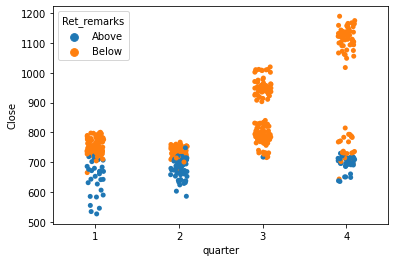

In [80]:
sns.stripplot(
    x='quarter', 
    y='Close', 
    hue='Ret_remarks',
    data=infy_ohlc)


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quarter', ylabel='Close'>

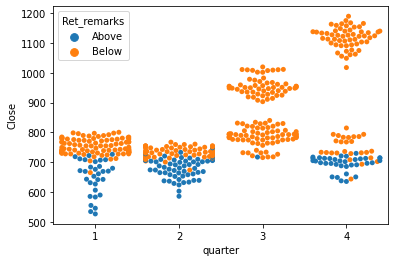

In [251]:
sns.swarmplot(
    x='quarter', 
    y='Close', 
    hue='Ret_remarks',
    data=infy_ohlc)


Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

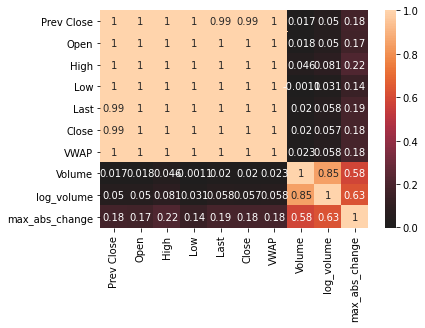

In [252]:
sns.heatmap(
 infy.iloc[:,:10].sort_index().assign(
         log_volume=np.log(infy.Volume), 
         max_abs_change=infy.High - infy.Low
     ).corr(), 
     annot=True, center=0)
infy.columns

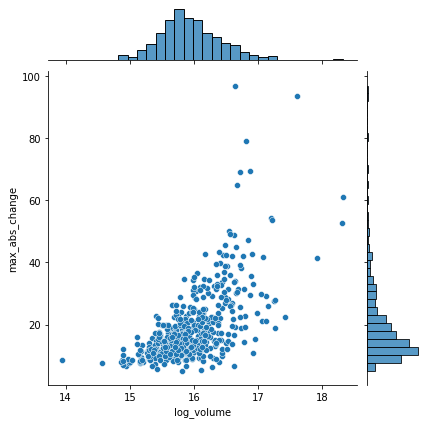

In [253]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=infy.assign(
         log_volume=np.log(infy.Volume), 
         max_abs_change=infy.High - infy.Low
     ) 
)

In [ ]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind = 'hex',
    data=infy.assign(
         log_volume=np.log(infy.Volume), 
         max_abs_change=infy.High - infy.Low
     ) 
)

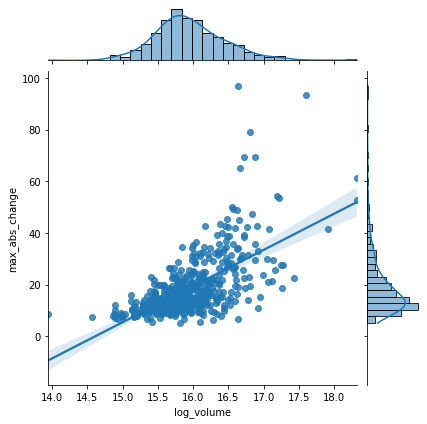

In [254]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind = 'reg',
    data=infy.assign(
         log_volume=np.log(infy.Volume), 
         max_abs_change=infy.High - infy.Low
     ) 
)

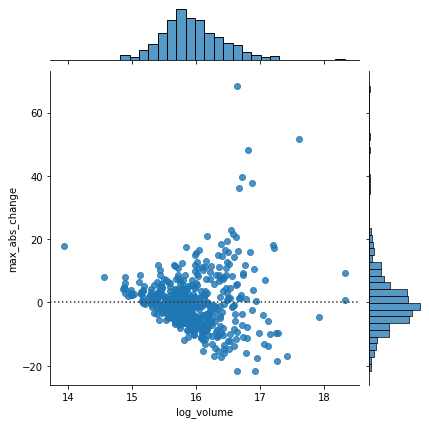

In [255]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind = 'resid',
    data=infy.assign(
         log_volume=np.log(infy.Volume), 
         max_abs_change=infy.High - infy.Low
     ) 
)

In [ ]:
#pip install pandas-profiling

In [256]:
from pandas_profiling import ProfileReport



In [257]:
prof = ProfileReport(sbi) 
prof.to_file(output_file='output.html')


KeyboardInterrupt: 

In [ ]:
prof

In [258]:
os.chdir('/Users/apple/Desktop/Others/Vijay/')
fin_plan = pd.read_csv('fin_plan.csv')
fin_plan.head()


,Unnamed: 0,Gender,Employment Details,Total earnings in years,fin_plan,fin_risk,fin_stability
0,0,Male,Private,14 lack,4.333333,3.6,3.571429
1,1,Male,Private,500000,3.000000,3.8,3.857143
2,2,Male,Private,400000,5.000000,5.0,2.714286
3,3,Male,Private,4,2.666667,4.2,3.714286
4,4,Female,Private,100000,2.666667,3.6,2.857143


In [ ]:
fin_plan[fin_plan.columns[1:]].head(2)
fin_plan.dropna()
cols = [0]
fin_plan.drop(fin_plan.columns[cols],axis=1,inplace=True)

In [259]:
prof = ProfileReport(fin_plan) 
prof.to_file(output_file='output.html')
prof